In [65]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from scipy import stats


In [35]:
df = pd.read_csv('equipment1.csv', sep=';', decimal=',')
df['Postav'] = df['Postav'].map({'ABC':0, 'PQR':1})

y = df[u'Postav']
X = df.drop(u'Postav', axis = 1)

In [36]:
def scale_features(X):
    scaled = preprocessing.StandardScaler().fit_transform(X)
    scaled = pd.DataFrame(scaled, columns=X.columns)
    return(scaled.head())

In [37]:
scale_features(X)

,Var1,Var2,Var3,Var4,Var5,Var6
0,0.790966,-0.475760,1.002669,0.903018,-0.120235,2.050800
1,0.370402,-0.659740,-0.910051,0.117268,-0.060951,0.935412
2,1.043303,-0.291780,1.987436,0.927962,-0.179518,0.442067
3,1.393773,-0.843719,0.794353,2.250017,-1.187340,1.042661
4,0.272271,0.536128,0.112591,0.079851,-0.120235,-0.072728


In [80]:
def logistic_regression(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,
                                                   test_size = 0.3)
    lr = LogisticRegression()
    model = lr.fit(X_train, y_train)
    print('Accuracy: {:.2f}'. format(model.score(X_train, y_train)))
    
    

In [81]:
logistic_regression(X,y)

Accuracy: 0.88


In [55]:
def prediction(X_test):
    predict = model.predict(X_test)
    fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, predict)
    plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBT + LR')
    plt.title("ROC-AUC")
    print('ROC AUC: {:.2f}'.format(metrics.roc_auc_score(y_test, predict)))
    print (metrics.classification_report(predict, y_test))

ROC AUC: 0.90
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        17
           1       0.95      0.86      0.90        22

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



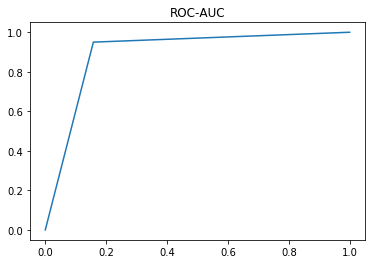

In [56]:
prediction(X_test)


In [84]:
a = model.intercept_ 
b = model.coef_
print (a, b)

[17.45473711] [[ 0.06867516  0.07315177 -0.08364711 -0.21782056 -0.18566014 -0.22760069]]
